<a href="https://colab.research.google.com/github/yuri-kasahara/Workshop-Tekst-som-data/blob/main/Processing_and_analyzing_text_SVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Now let's process our text and try to get some meaning out of it.

In [1]:
#This cell will load the packages we need. Do not change anything here!

!pip install spacy
!python -m spacy download nb_core_news_sm
!pip install wordcloud
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.6.0/en_core_web_sm-3.6.0.tar.gz
!pip install gensim
!pip install pyldavis
!pip install pandas==1.5.3
!pip uninstall -y numpy
!pip install numpy==1.23.4



2024-01-16 18:03:40.947455: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-16 18:03:40.947566: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-16 18:03:40.949803: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-16 18:03:40.963111: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-16 18:03:42.539653: W tensorflow/compiler/tf2

In [2]:
#This one will import specific functions. Do not change anything here!

import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from wordcloud import WordCloud
from gensim import corpora, models



In [3]:
#This one will load your Google drive folder!

from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive


Now let's load our scraped data and merge all files.

In [4]:
df = pd.read_csv("drive/MyDrive/WorkshopTSD/Info_reports.csv", sep=',', dtype='string')

df2 = pd.read_csv("drive/MyDrive/WorkshopTSD/Info_reports_AFI.csv", sep=',', dtype='string')

df3 = pd.read_csv("drive/MyDrive/WorkshopTSD/Info_reports_NOVA.csv", sep=',', dtype='string')

df4 = pd.read_csv("drive/MyDrive/WorkshopTSD/Info_reports_SIFO.csv", sep=',', dtype='string')

dfSVA = pd.concat([df, df2, df3, df4], ignore_index=True)

print(dfSVA)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                                  Title  \
0     Bærekraftig befolkningsutvikling og grønn dist...   
1     Risikovurdering og reintegrering av radikalise...   
2     Midtvegsevaluering av Program for folkehelsear...   
3     Flyktningers møte med NAV.  Kommunikasjon og t...   
4     Vil gjerne vite mer: Kompetansebehov om negati...   
...                                                 ...   
1658  Nordmenns brød- og kornvaner - i stabilitet og...   
1659  Å spise ute. Hvem, hva, hvor, hvordan, hvorfor...   
1660  Forbuden frukt smaker best - en studie av nord...   
1661  Ungdoms skolematvaner. Refleksjon, reaksjon el...   
1662                             Julens mat og måltider   

                                               Abstract  Year Institute  
0     Rapporten handler om bærekraftig befolkningsut...  2023      NIBR  
1     Rapporten belyser arbeidet med risikovurdering...  2023      NIBR  
2     Rapporten er ei midtvegsevaluering av Program ...  2023      NI

In [5]:
#We want to remove the rows where "Abstract" is empty
dfSVA.dropna(inplace=True)

dfSVA.to_csv('drive/MyDrive/WorkshopTSD/Info_reports_SVA.csv', index=False)

print(dfSVA)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                                  Title  \
0     Bærekraftig befolkningsutvikling og grønn dist...   
1     Risikovurdering og reintegrering av radikalise...   
2     Midtvegsevaluering av Program for folkehelsear...   
3     Flyktningers møte med NAV.  Kommunikasjon og t...   
4     Vil gjerne vite mer: Kompetansebehov om negati...   
...                                                 ...   
1658  Nordmenns brød- og kornvaner - i stabilitet og...   
1659  Å spise ute. Hvem, hva, hvor, hvordan, hvorfor...   
1660  Forbuden frukt smaker best - en studie av nord...   
1661  Ungdoms skolematvaner. Refleksjon, reaksjon el...   
1662                             Julens mat og måltider   

                                               Abstract  Year Institute  
0     Rapporten handler om bærekraftig befolkningsut...  2023      NIBR  
1     Rapporten belyser arbeidet med risikovurdering...  2023      NIBR  
2     Rapporten er ei midtvegsevaluering av Program ...  2023      NI

Let's first see how many reports were published per year by each institute.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


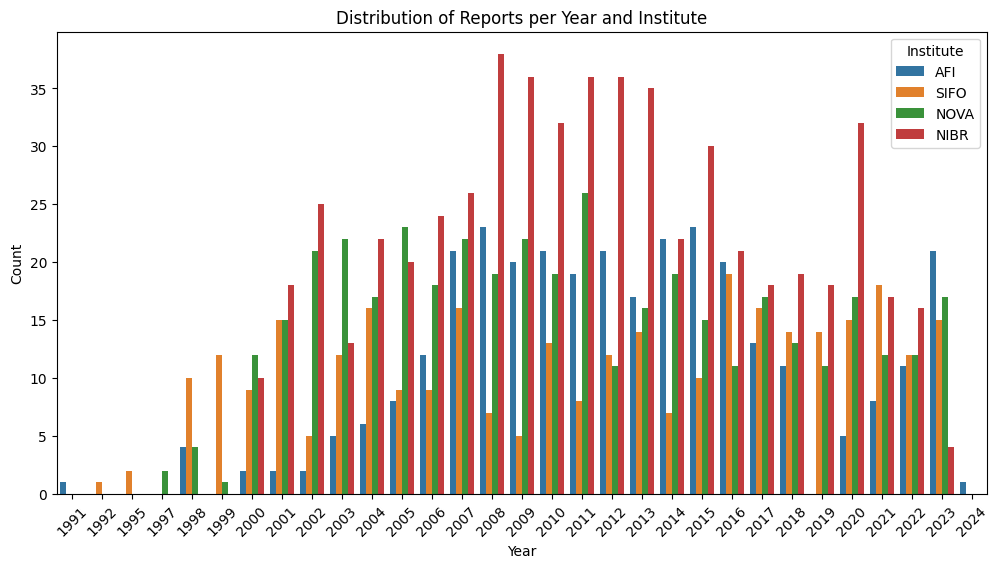

In [6]:


# Grouping data by 'Year' and 'Institute' and counting the number of rows
grouped_data = dfSVA.groupby(['Year', 'Institute']).size().reset_index(name='Count')

# Pivot the data for better plotting (Year as index, Institute as columns)
pivot_data = grouped_data.pivot(index='Year', columns='Institute', values='Count').fillna(0)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Count', hue='Institute', data=grouped_data)
plt.title('Distribution of Reports per Year and Institute')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


**Now let's make our "bag of words" and tokenize the abstracts!**

In [8]:
# Let's load a trained model from spacy. Remember to load one appropriate to the language of your documents.
# The model in parenthesis is for Bokmål
nlp = spacy.load('nb_core_news_sm')

token_list = []


# This code will tokenize our abstracts and do the following: transform all words to lower.case, add the POS tag, the Lemma version of the word and the associated title, institute and year of the word.
for _, row in dfSVA.iterrows():
  doc = nlp(row['Abstract'])
  for token in doc:
     if not token.is_punct and not token.is_space:
        token_list.append({'Title': row['Title'],'Institute': row['Institute'], 'Year': row['Year'], 'Token':token.text.lower(), 'POS': token.pos_, 'Lemma': token.lemma_.lower()})

token_df = pd.DataFrame(token_list)

# We can also add other inbuilt classifications from Spacy as Named Entity Recognition and Chunks.

print(token_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                                    Title Institute  Year  \
0       Bærekraftig befolkningsutvikling og grønn dist...      NIBR  2023   
1       Bærekraftig befolkningsutvikling og grønn dist...      NIBR  2023   
2       Bærekraftig befolkningsutvikling og grønn dist...      NIBR  2023   
3       Bærekraftig befolkningsutvikling og grønn dist...      NIBR  2023   
4       Bærekraftig befolkningsutvikling og grønn dist...      NIBR  2023   
...                                                   ...       ...   ...   
221654                             Julens mat og måltider      SIFO  2006   
221655                             Julens mat og måltider      SIFO  2006   
221656                             Julens mat og måltider      SIFO  2006   
221657                             Julens mat og måltider      SIFO  2006   
221658                             Julens mat og måltider      SIFO  2006   

                       Token   POS                 Lemma  
0               

Let's try to identify "entities" in our corpus.

In [9]:
ent_list =[]

for _, row in dfSVA.iterrows():
  doc = nlp(row['Abstract'])
  for e in doc.ents:
      ent_list.append({'Title': row['Title'],'Institute': row['Institute'], 'Year': row['Year'], 'ent_text':e.text,
                           'ent_label': e.label_, 'description': str(spacy.explain(e.label_))})

ent_df = pd.DataFrame(ent_list)

print(ent_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                                  Title Institute  Year  \
0     Bærekraftig befolkningsutvikling og grønn dist...      NIBR  2023   
1     Bærekraftig befolkningsutvikling og grønn dist...      NIBR  2023   
2     Bærekraftig befolkningsutvikling og grønn dist...      NIBR  2023   
3     Risikovurdering og reintegrering av radikalise...      NIBR  2023   
4     Risikovurdering og reintegrering av radikalise...      NIBR  2023   
...                                                 ...       ...   ...   
6659                             Julens mat og måltider      SIFO  2006   
6660                             Julens mat og måltider      SIFO  2006   
6661                             Julens mat og måltider      SIFO  2006   
6662                             Julens mat og måltider      SIFO  2006   
6663                             Julens mat og måltider      SIFO  2006   

                    ent_text ent_label  \
0                    Lofoten   GPE_LOC   
1              

**Let's now calculate some frequencies!**

In [10]:
frequency_df = token_df.groupby(['Token']).size().reset_index(name='Frequency')

# Sort in descending order
sorted_df = frequency_df.sort_values(by=['Frequency'], ascending=[False])


#
print(sorted_df)

             Token  Frequency
15146           og       9448
9617             i       7452
2064            av       5048
5737            er       3982
6818           for       3967
...            ...        ...
10660        iplos          1
10661         irak          1
10662         iran          1
10667      ironien          1
24289  ˜potensiell          1

[24290 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


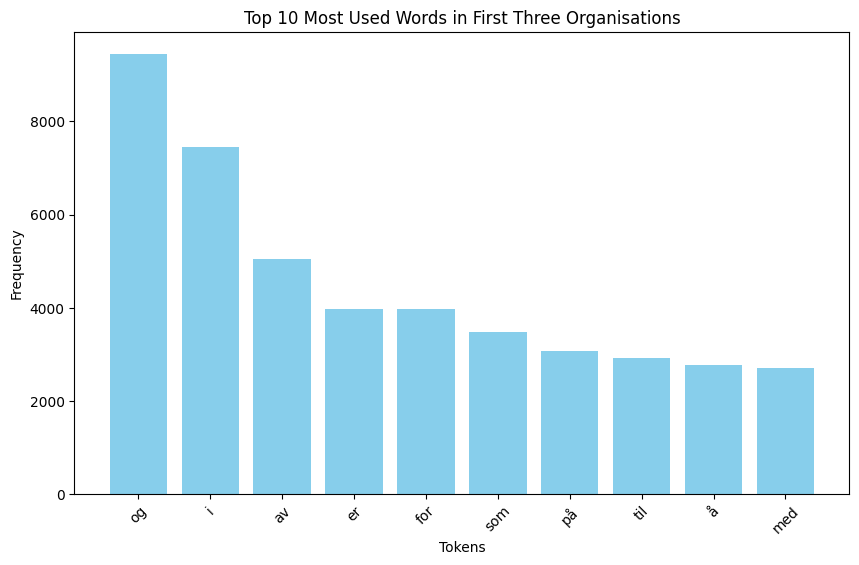

In [11]:
# Let's plot a histogram of the top 10 words.



top_10_words = frequency_df.nlargest(10, 'Frequency')

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(top_10_words['Token'], top_10_words['Frequency'], color='skyblue')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words in First Three Organisations')
plt.xticks(rotation=45)
plt.show()


A lot of not very meaningful words... Let's remove them!

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


            Token  Frequency
21352         the       2114
17412   rapporten       1630
15111          of       1271
21829          to       1011
9854           in       1006
824             a        665
9505      hvordan        615
22390       ulike        510
10670          is        462
17124  prosjektet        448


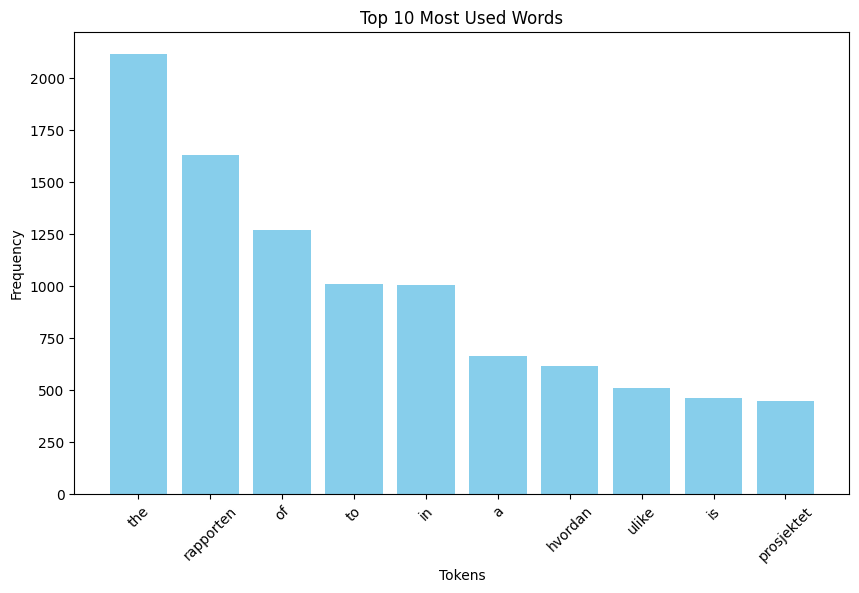

In [13]:
# Let's filter the stop words!

stop_words = nlp.Defaults.stop_words
frequency_df = frequency_df[~frequency_df['Token'].isin(stop_words)]

# And let's plot the figure again

top_10_words = frequency_df.nlargest(10, 'Frequency')

print(top_10_words)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(top_10_words['Token'], top_10_words['Frequency'], color='skyblue')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words')
plt.xticks(rotation=45)
plt.show()




Hnm... it seems we have a lot of English words in our corpus. Let's remove stopwords in English.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


            Token  Frequency
17412   rapporten       1630
9505      hvordan        615
22390       ulike        510
17124  prosjektet        448
2300         barn        399
9467          hva        364
17109    prosjekt        343
14806      norske        339
22627        unge        321
14773       norge        311


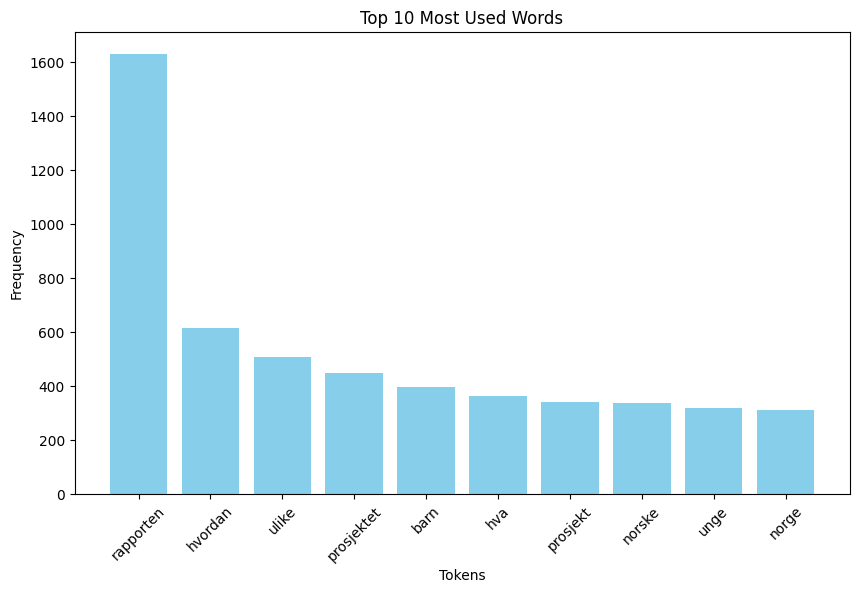

In [15]:
#Load the model for English

nlp_eng = spacy.load('en_core_web_sm')

# Let's filter the stop words!

stop_words_eng = nlp_eng.Defaults.stop_words
frequency_df = frequency_df[~frequency_df['Token'].isin(stop_words_eng)]

# And let's plot the figure again

top_10_words = frequency_df.nlargest(10, 'Frequency')

print(top_10_words)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(top_10_words['Token'], top_10_words['Frequency'], color='skyblue')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words')
plt.xticks(rotation=45)
plt.show()








Let's use the lemma of each word and select only nouns, verbs, adj and adv!

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


          Lemma  Frequency
13422   rapport       1687
13191  prosjekt        941
8582    kommune        691
1428       barn        582
17312      ulik        547
18433      vise        534
11393     norsk        518
803      arbeid        429
17448       ung        412
17463    ungdom        372


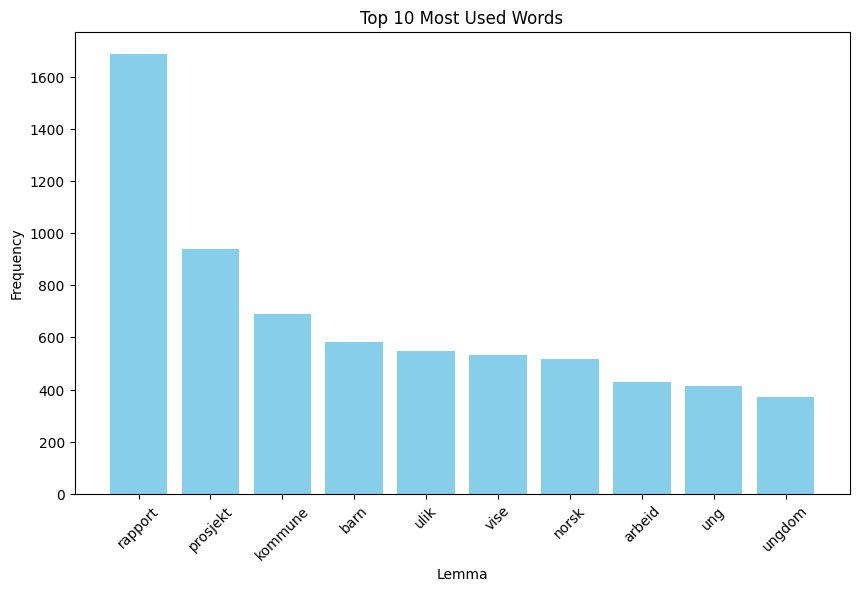

In [16]:
freq_nouns_df = token_df[token_df['POS'].isin(['NOUN', 'VERB', 'ADJ', 'PROPN'])]

freq_nouns_df = freq_nouns_df.groupby(['Lemma']).size().reset_index(name='Frequency')

freq_nouns_df = freq_nouns_df[~freq_nouns_df['Lemma'].isin(stop_words)]
freq_nouns_df = freq_nouns_df[~freq_nouns_df['Lemma'].isin(stop_words_eng)]



# And let's plot the figure again

top_10_words = freq_nouns_df.nlargest(10, 'Frequency')

print(top_10_words)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(top_10_words['Lemma'], top_10_words['Frequency'], color='skyblue')
plt.xlabel('Lemma')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words')
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


             Lemma  Frequency
8582       kommune        691
1428          barn        582
17312         ulik        547
18433         vise        534
11393        norsk        518
17448          ung        412
17463       ungdom        372
18782          øke        371
6158   gjennomføre        364
11366        norge        350


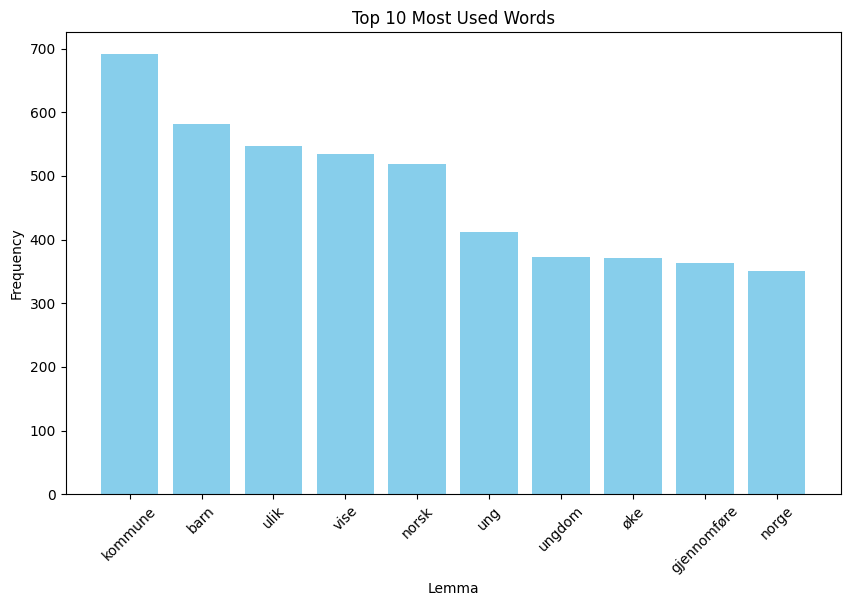

In [17]:
#Let's try to remove some additional words

more_words = ['rapport', 'prosjekt', 'arbeid', 'grad', 'resultat', 'tiltak', 'evaluering', 'forhold', 'erfaring', 'kunnskap', 'undersøkelse', 'studie']


freq_nouns_df = freq_nouns_df[~freq_nouns_df['Lemma'].isin(more_words)]


# And let's plot the figure again

top_10_words = freq_nouns_df.nlargest(10, 'Frequency')

print(top_10_words)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(top_10_words['Lemma'], top_10_words['Frequency'], color='skyblue')
plt.xlabel('Lemma')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words')
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


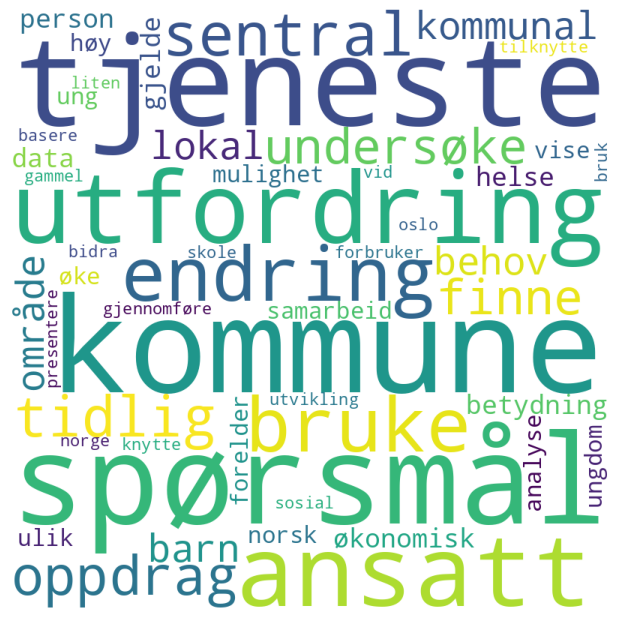

In [18]:

top_50 = freq_nouns_df.nlargest(50, 'Frequency')

word_freq = top_50['Lemma'].value_counts().to_dict()

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10)

wordcloud.generate_from_frequencies(word_freq)

# Plotting the WordCloud
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Now, let's try some Topic Modelling using LDA (Latent Dirichlet Allocation).

In [34]:
#Let's clean the corpus again and also keep only nouns based on their POS classifications.

token_df_clean = token_df[token_df['POS'].isin(['NOUN', 'PROPN'])]

token_df_clean = token_df_clean[~token_df['Lemma'].isin(stop_words)]

token_df_clean = token_df_clean[~token_df_clean['Lemma'].isin(stop_words_eng)]

more_words = ['rapport', 'prosjekt', 'arbeid', 'grad', 'resultat', 'tiltak', 'evaluering', 'forhold', 'erfaring', 'kunnskap', 'undersøkelse', 'studie', 'prosent', 'nummer',
              'analyse', 'oppdrag', 'spørsmål', 'forskning', 'form', 'bilde', 'data', 'betydning', 'forsøk', 'deltaker', 'oppfølging']


token_df_clean = token_df_clean[~token_df_clean['Lemma'].isin(more_words)]


#We can also select only one institute
#token_df_clean = token_df_clean[token_df_clean['Institute'] == 'NIBR']

#Sort the titles in alphabetical order
token_df_clean = token_df_clean.sort_values(by=['Title'])
print(token_df_clean)

# Prepare the data (list of lists)

docs = token_df_clean.groupby('Title')['Lemma'].apply(list).tolist()

docs_test = token_df_clean.groupby('Title')['Lemma'].apply(list)
print(docs_test)

# Create a dictionary (or another suitable data structure) to map Document_ID to metadata
metadata = token_df_clean.drop_duplicates('Title').set_index('Title')['Institute'].to_dict()

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(docs)

# Filter out extremes to limit the number of features. no_below means that we remove tokens that appear in less than 1 document and no_above means that we remove tokens that appear in more than 60% of the documents
dictionary.filter_extremes(no_below=1, no_above=0.6, keep_n=10000)

# Create a corpus: list of bag of words (bow) for each document
corpus = [dictionary.doc2bow(doc) for doc in docs]

print("First document tokens:", docs[0])
print("First document metadata:", metadata[token_df_clean['Title'].iloc[0]])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-34-e8e060e093c7>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  token_df_clean = token_df_clean[~token_df['Lemma'].isin(stop_words)]


                                                   Title Institute  Year  \
65588  "Being a foreigner is no advantage" – Career p...       AFI  2016   
65820  "Being a foreigner is no advantage" – Career p...       AFI  2016   
65822  "Being a foreigner is no advantage" – Career p...       AFI  2016   
65825  "Being a foreigner is no advantage" – Career p...       AFI  2016   
65826  "Being a foreigner is no advantage" – Career p...       AFI  2016   
...                                                  ...       ...   ...   
50512  ”Vi må ikke glemme at vi er høye, mørke og ste...       AFI  2010   
50511  ”Vi må ikke glemme at vi er høye, mørke og ste...       AFI  2010   
50510  ”Vi må ikke glemme at vi er høye, mørke og ste...       AFI  2010   
50533  ”Vi må ikke glemme at vi er høye, mørke og ste...       AFI  2010   
50639  ”Vi må ikke glemme at vi er høye, mørke og ste...       AFI  2010   

              Token    POS         Lemma  
65588          good  PROPN          good  
6

The number of topics is arbitrary, but there are ways to find the optimal number of topics. Let's calculate the perplexity and coherence scores for models ranging from 1 to 30 topics.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


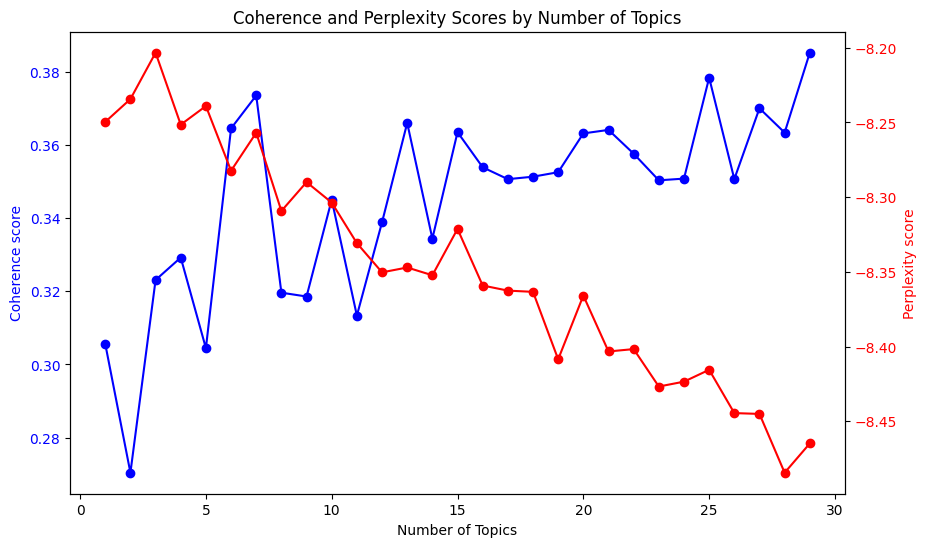

In [35]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

topic_range = range(1, 30)

# Lists to store coherence and perplexity values
coherence_values = []
perplexity_values = []

for num_topics in topic_range:
    # Train LDA model
    lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

    # Coherence
    coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

    # Perplexity
    perplexity_lda = lda_model.log_perplexity(corpus)
    perplexity_values.append(perplexity_lda)

# Plotting the results
plt.figure(figsize=(10, 6))

# Coherence (left y-axis)
plt.plot(topic_range, coherence_values, marker='o', color='b', label='Coherence')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score", color='b')
plt.tick_params(axis='y', labelcolor='b')

# Perplexity (right y-axis)
plt.twinx()
plt.plot(topic_range, perplexity_values, marker='o', color='r', label='Perplexity')
plt.ylabel("Perplexity score", color='r')
plt.tick_params(axis='y', labelcolor='r')

plt.title("Coherence and Perplexity Scores by Number of Topics")
plt.show()

In [41]:
# Apply LDA
lda_model = models.LdaModel(corpus, num_topics=6, id2word=dictionary, passes=10)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic: 0 
Words: 0.031*"barn" + 0.012*"forelder" + 0.008*"familie" + 0.006*"norge" + 0.006*"oslo" + 0.005*"gruppe" + 0.005*"innvandrer" + 0.004*"forskjell" + 0.004*"ungdom" + 0.004*"forbruker"
Topic: 1 
Words: 0.018*"barn" + 0.015*"kommune" + 0.006*"norge" + 0.006*"barnehage" + 0.005*"samarbeid" + 0.005*"reklame" + 0.005*"område" + 0.005*"skole" + 0.004*"utfordring" + 0.004*"oslo"
Topic: 2 
Words: 0.023*"kommune" + 0.009*"bruk" + 0.005*"ull" + 0.004*"utvikling" + 0.004*"norwegian" + 0.004*"tjeneste" + 0.004*"samarbeid" + 0.004*"ungdom" + 0.004*"bruker" + 0.004*"case"
Topic: 3 
Words: 0.022*"ungdom" + 0.009*"oslo" + 0.007*"skole" + 0.006*"norge" + 0.005*"kommune" + 0.005*"bolig" + 0.005*"helse" + 0.005*"holdning" + 0.004*"elev" + 0.004*"område"
Topic: 4 
Words: 0.009*"kommune" + 0.008*"mat" + 0.007*"kvinne" + 0.006*"utvikling" + 0.006*"norge" + 0.006*"endring" + 0.005*"produkt" + 0.005*"forbruker" + 0.005*"people" + 0.005*"eating"
Topic: 5 
Words: 0.008*"arbeidsliv" + 0.007*"skole" + 0.

In [42]:
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary, mds="mmds", R=20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [43]:
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.036164 -0.037715       1        1  19.565969
2     -0.078124  0.125017       2        1  17.340595
5      0.060098 -0.143846       3        1  16.224611
0      0.083817  0.118561       4        1  16.030981
3      0.129213 -0.007720       5        1  15.838485
4     -0.158840 -0.054297       6        1  14.999358, topic_info=          Term        Freq       Total Category  logprob  loglift
290       barn  493.000000  493.000000  Default  20.0000  20.0000
392     ungdom  316.000000  316.000000  Default  19.0000  19.0000
437   forelder  185.000000  185.000000  Default  18.0000  18.0000
419    kommune  586.000000  586.000000  Default  17.0000  17.0000
342       elev  104.000000  104.000000  Default  16.0000  16.0000
..         ...         ...         ...      ...      ...      ...
585      rolle   25.738176  102.423783   Topic6  -5.7816   0.5160
512      helse   27.991544  147.494626   Topic6  -5.6977   0.2353
430  samarbeid   29.046867  193.656994   Topic6  -5.6607  -0.0000
723   tjeneste   28.257015  184.169207   Topic6  -5.6883   0.0226
392     ungdom   26.485027  316.064785   Topic6  -5.7530  -0.5822

[313 rows x 6 columns], token_table=      Topic      Freq                   Term
term                                        
1         4  0.844332                academi
9750      6  0.854396                    aks
4690      4  0.844428  aktiviseringspolitikk
8         4  0.788026               ambition
309       1  0.214269                  andel
...     ...       ...                    ...
779       3  0.024848                   vold
779       4  0.409999                   vold
779       5  0.223636                   vold
779       6  0.111818                   vold
8559      2  0.955173                   wool

[716 rows x 3 columns], R=20, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 6, 1, 4, 5])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['delrapport', 'nurse-family', 'sommer', 'resultatevaluering', 'høst', 'prosess', 'sommer', 'sommer', 'prosess-', 'resultatevaluering', 'oppstartsfas', 'delrapport', 'prosess-', 'følgeevaluering', 'program', 'resultatevaluering', 'partnership', 'nfp', 'norsk', 'prosjektperiod', 'sluttrapport', 'høst', 'utprøving', 'prosessevaluering', 'familie', 'norge', 'arbeidsforskningsinstituttet', 'delrapport', 'wendy', 'nilsen', 'afi', 'pedersen', 'barne-', 'ungdoms-', 'familiedirektorate', 'bufdir', 'delrapportering', 'eirin']


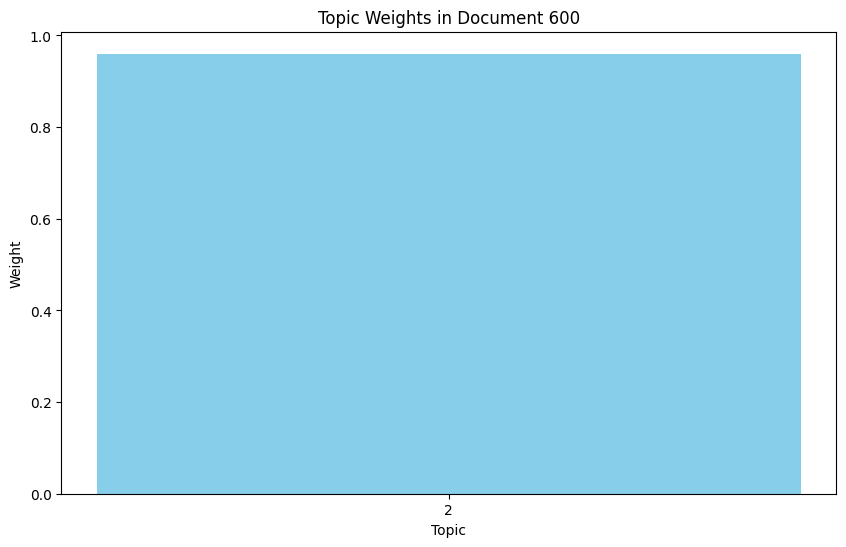

In [44]:
doc_index = 600  # For example, the first document in the corpus

# Get the topic distribution for the selected document
doc_topics = lda_model.get_document_topics(corpus[doc_index])
print(docs[550])

# Extracting topics and their weights
topics, weights = zip(*doc_topics)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(topics, weights, color='skyblue')
plt.xlabel('Topic')
plt.ylabel('Weight')
plt.title(f'Topic Weights in Document {doc_index}')
plt.xticks(topics)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[0, 2, 2, 3, 1, 5, 5, 3, 2, 2, 0, 3, 1, 4, 1, 3, 4, 2, 0, 2, 1, 2, 3, 2, 3, 5, 1, 2, 5, 0, 1, 2, 3, 5, 1, 3, 0, 0, 0, 4, 5, 2, 3, 0, 5, 5, 5, 2, 2, 0, 1, 3, 1, 2, 5, 0, 3, 3, 4, 5, 4, 4, 4, 2, 3, 1, 1, 0, 5, 1, 1, 5, 5, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 5, 3, 1, 1, 3, 3, 0, 3, 3, 5, 2, 0, 0, 0, 4, 5, 2, 3, 2, 2, 2, 1, 3, 0, 3, 3, 0, 4, 5, 5, 5, 1, 4, 1, 5, 0, 5, 0, 3, 4, 4, 4, 1, 2, 3, 1, 3, 3, 3, 3, 4, 3, 3, 0, 0, 0, 1, 3, 3, 3, 2, 3, 2, 1, 4, 0, 0, 4, 0, 1, 2, 1, 4, 4, 4, 3, 0, 0, 2, 2, 5, 1, 1, 5, 1, 5, 5, 4, 0, 3, 2, 3, 3, 2, 3, 5, 2, 3, 0, 2, 3, 2, 2, 1, 1, 3, 5, 0, 3, 0, 1, 0, 3, 2, 5, 1, 3, 1, 5, 2, 5, 4, 4, 0, 3, 1, 4, 0, 3, 0, 5, 1, 4, 2, 1, 1, 4, 1, 5, 4, 5, 1, 4, 5, 3, 3, 2, 0, 3, 2, 1, 0, 0, 2, 3, 3, 2, 1, 3, 2, 1, 4, 0, 2, 2, 3, 5, 4, 0, 4, 3, 0, 4, 0, 2, 2, 1, 0, 3, 1, 2, 3, 1, 2, 0, 0, 1, 1, 5, 5, 0, 2, 2, 3, 0, 4, 0, 2, 2, 4, 4, 4, 5, 3, 5, 5, 2, 2, 1, 0, 1, 5, 3, 1, 0, 0, 1, 5, 0, 4, 1, 5, 2, 0, 5, 4, 4, 5, 1, 0, 5, 4, 0, 0, 3, 4, 5, 0, 2, 5, 2, 

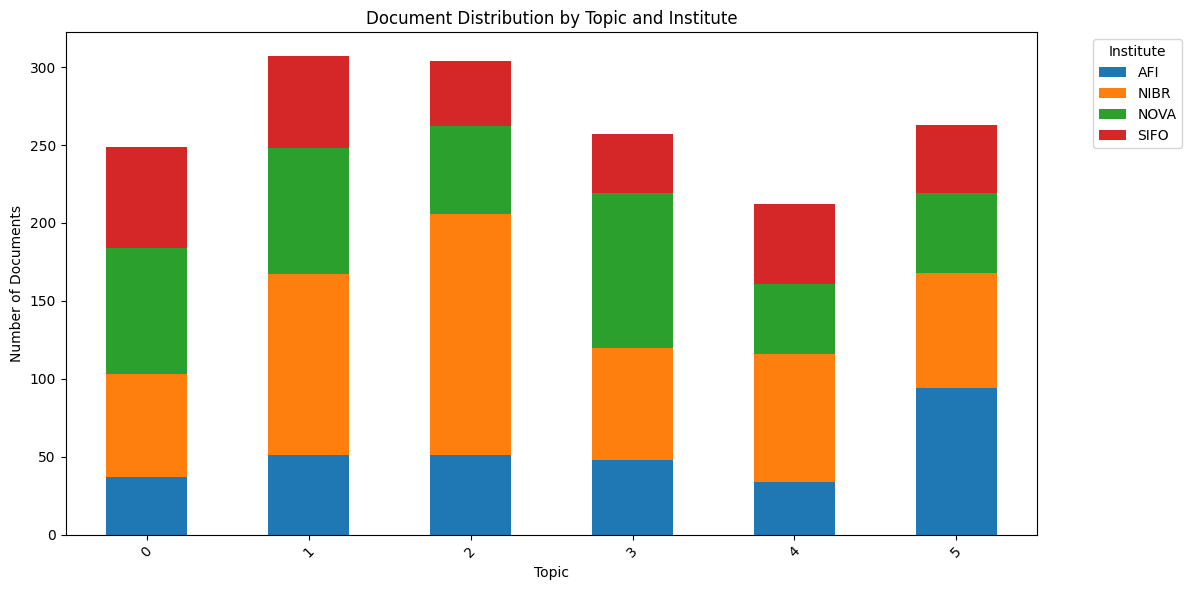

In [45]:
# Step 1: Determine the Dominant Topic for Each Document
dominant_topics = []
for doc_bow in corpus:
    topic_distribution = lda_model.get_document_topics(doc_bow)
    dominant_topic = sorted(topic_distribution, key=lambda x: x[1], reverse=True)[0][0]
    dominant_topics.append(dominant_topic)
print(dominant_topics)

# Step 2: Create a DataFrame with 'Title', 'Institute', and 'Dominant Topic'
titles = token_df_clean['Title'].drop_duplicates().tolist()  # List of unique titles

doc_data = pd.DataFrame({'Title': titles, 'Dominant_Topic': dominant_topics})
doc_data['Institute'] = doc_data['Title'].map(metadata)
print(doc_data)
# Step 3: Count Documents per Topic per 'Institute'
topic_institute_distribution = doc_data.groupby(['Dominant_Topic', 'Institute']).size().unstack(fill_value=0)

institute_distribution = doc_data.groupby(['Institute']).size()
print(institute_distribution)

# Step 4: Plot the Results
topic_institute_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Topic')
plt.ylabel('Number of Documents')
plt.title('Document Distribution by Topic and Institute')
plt.xticks(rotation=45)
plt.legend(title='Institute', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
